In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## General Truncation Error

Increases sort-of linearly with Euler's method, but parabolically (and much less) with Heun's method:

$$ x -> x_{t-1} + h \frac{\frac{\partial x}{\partial t} + E_0}{2} $$

where E0 is the Euler estimate for the update. This is kind of like "compensating" for the fact that the dynamics evolve between dt intervals. 

Heun's method is of second order in the GTE: i.e. the GTE increases with the square of the step size h. Euler's method is first-order. 

We can find the **Local Truncation Error** (LTE) such that it has a "tolerance", and thus estimate the optimal test size: 

$$ C h_{new}^2 \sim tolerance $$

$$ \frac{LTE_E}{h_{old}^2} h^2 ~ tolerance $$

$$ h_{new} = h_{old} \sqrt{ \frac{tolerance}{LTE_E} } $$

In [2]:
total_time = 12500.
g = 9.81
earth_mass = 5.9e24
gravitational_constant = 6.67e-11

def acceleration(spaceship_position):
    vector_to_earth = -spaceship_position
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth)**3\
    *vector_to_earth

In [8]:
def orbit():
    x = np.zeros(2)
    v = np.zeros(2)
    x[0] = 15e6
    x[1] = 1e6
    v[0] = 2e3
    v[1] = 4e3
    plt.scatter(x[0], x[1], s=4)
    
    current_time = 0.
    h = 100.
    h_new = h # adaptive step size
    tolerance = 5e5 # meters
    
    while current_time < total_time:
        acceleration0 = acceleration(x)
        xE = x + h*v
        vE = v + h*acceleration0
        
        xH = x + h*0.5*(v+vE)
        vH = v + h*0.5*(acceleration0 + acceleration(xE))
        x = xH
        v = vH
        
        ## chal ##
        error = np.linalg.norm(xE-xH) + total_time * np.linalg.norm(vE-vH)
        
        h_new = h * np.sqrt(tolerance/error)
    
        plt.scatter(x[0], x[1], s=1)
        current_time += h
        h = h_new
        
    plt.axis('equal')
    plt.scatter(0., 0.)
    axes = plt.gca()
    axes.set_xlabel('Longditudinal position (m)')
    axes.set_ylabel('Lateral position (m)')
    return x, v

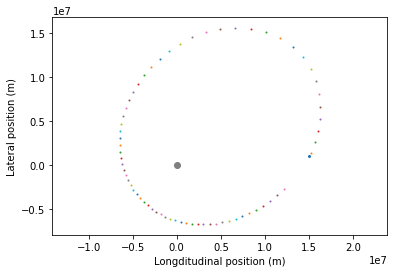

In [9]:
x, v = orbit()

## Long-term Error

How bad does it get if we let it simulate for baaare long?

We can use **Energy** as a way of calculating how bad it will get

For this problem, the relevant quantities are Kinetic and Potential Energy 

So, sum of KE and PE must be a constant. 

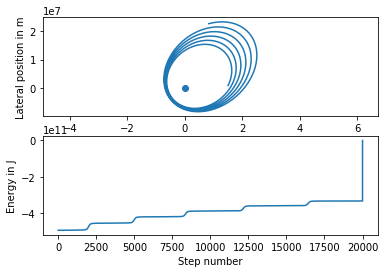

In [25]:
# QUIZ
#
# Fill in the total_energy function 
# below to compute the total energy 
# at each time step and store it in 
# the array energy.

import numpy
import matplotlib

h = 5.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def total_energy():
    num_steps = 20000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    energy = numpy.zeros(num_steps + 1) # J = kg m2 / s2

    x[0, 0] = 15e6
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step] 
        v[step + 1] = v[step] + h * acceleration(x[step])

###Your code here.
        KE = 0.5 * spacecraft_mass * numpy.linalg.norm(v[step])**2
        PE = gravitational_constant * earth_mass * spacecraft_mass /\
        numpy.linalg.norm(x[step]) 
        energy[step] = KE - PE

    return x, energy

x, energy = total_energy()

def plot_me():
    axes_positions = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes_positions.set_xlabel('Longitudinal position in m')
    axes_positions.set_ylabel('Lateral position in m')
    axes_energy = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(energy)
    axes_energy.set_xlabel('Step number')
    axes_energy.set_ylabel('Energy in J') # 1 Joule = 1 N m = 1 kg m2 / s2
plot_me()

## Area in Phase Space and Symplectic Methods

Is related to conservation of energy

This can be seen as the evolution of an area of infinite starting points. The area of the state of the system after some point will have the same area.

If we don't use infinitesimally small time-steps, this won't be true :( 

A cool way to solve this (symplectically) is to do this procedurally: solve e.g. x(t) and then v(t) using x(t), not x(t-1). 

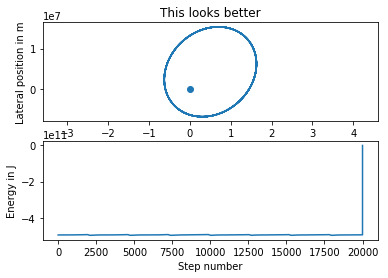

In [27]:
# QUIZ
#
# Fill in the total_energy function 
# below to compute the total energy 
# at each time step and store it in 
# the array energy.

import numpy
import matplotlib

h = 5.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def total_energy():
    num_steps = 20000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    energy = numpy.zeros(num_steps + 1) # J = kg m2 / s2

    x[0, 0] = 15e6
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step] 
        v[step + 1] = v[step] + h * acceleration(x[step+1])

###Your code here.
        KE = 0.5 * spacecraft_mass * numpy.linalg.norm(v[step])**2
        PE = gravitational_constant * earth_mass * spacecraft_mass /\
        numpy.linalg.norm(x[step]) 
        energy[step] = KE - PE

    return x, energy

x, energy = total_energy()

def plot_me():
    axes_positions = matplotlib.pyplot.subplot(211)
    plt.title("This looks better")
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes_positions.set_xlabel('Longitudinal position in m')
    axes_positions.set_ylabel('Lateral position in m')
    axes_energy = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(energy)
    axes_energy.set_xlabel('Step number')
    axes_energy.set_ylabel('Energy in J') # 1 Joule = 1 N m = 1 kg m2 / s2
plot_me()

## Using a boost to take us to a different orbit

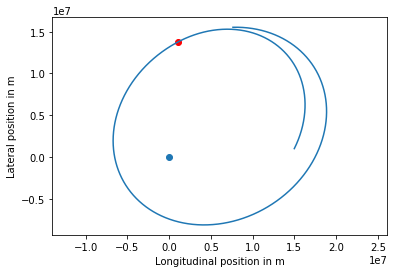

In [28]:
# QUIZ
#
# We need to demonstrate firing the 
# boost rocket at the appropriate 
# time, and show how that alters the 
# trajectory of the capsule! Modify 
# the apply_boost function below to 
# fire the boost rocket 2 hours 
# after start, increasing the speed 
# by 300 m / s in the current 
# direction of travel when you do.
#
# HINT: Use the boolean variable 
# boost_done to store whether or not 
# this boost has occurred.

import numpy 
import matplotlib
h = 3.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

# This is used to keep track of the data that we want to plot.
data = []

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def apply_boost():
    num_steps = 7000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = 15e6
    x[0, 1] = 1e6    
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    boost_done = False
    boost_onset = 2 * num_steps/60

    v0 = v
    for step in range(num_steps):
        if h*step >= 2. * 3600 and not boost_done:
            v[step] += 300. * v[step] / numpy.linalg.norm(v[step])
            boost_done = True
            time_stamp = h*step
        
            data.append((x[step, 0], x[step, 1]))

        acceleration0 = acceleration(x[step])
        xE = x[step] + h * v[step]
        vE = v[step] + h * acceleration0
        x[step + 1] = x[step] + h * 0.5 * (v[step] + vE)
        v[step + 1] = v[step] + h * 0.5 * (acceleration0 + acceleration(xE))

    return x, v

x, v = apply_boost()

def plot_me():
    for (x_0, x_1) in data:
        matplotlib.pyplot.scatter(x_0, x_1, c = 'r')
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')

plot_me()

